In [1]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Clustering analysis

Use various clustering techniques to identify a good subset of questions.

---

In [2]:
import os
import sys

import pandas as pd
import seaborn as sns

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
%aimport visualization.visualize
from visualization.visualize import biplot, plot_explained_variance, triplot

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
YEAR = 2016

In [4]:
df = pd.read_csv("../data/processed/{}.csv".format(YEAR), index_col=0)

In [5]:
weights = pd.read_csv("../data/processed/{}_weights.csv".format(YEAR), index_col=0, header=None, squeeze=True)
weights.shape

(4271,)

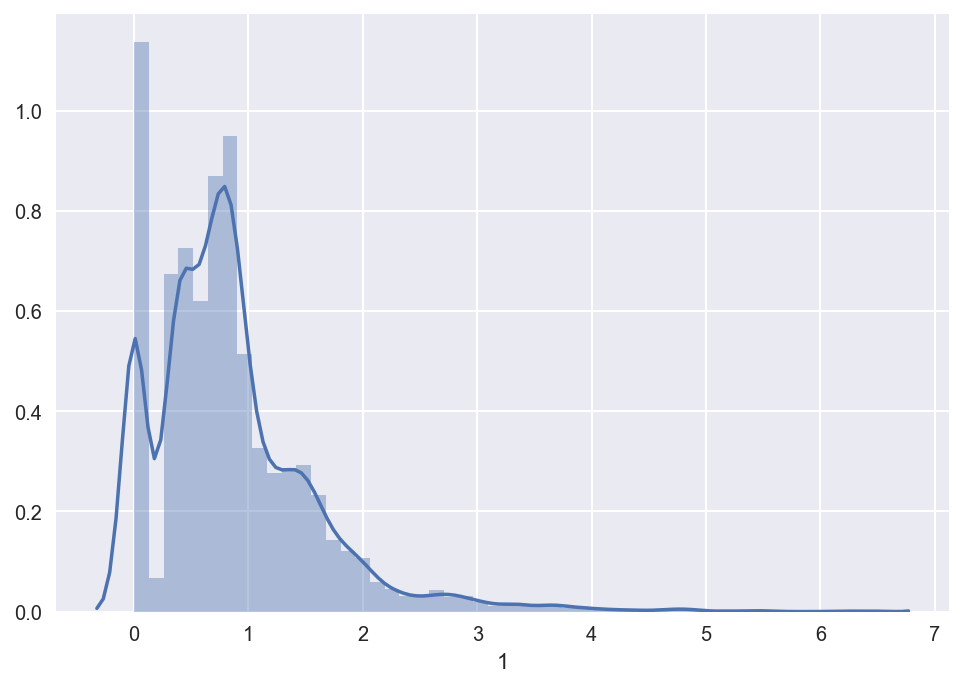

In [6]:
sns.distplot(weights)

## Principal component analysis

In [7]:
def make_weights_matrix(weights, X):
    if weights.shape[0] != X.shape[0]:
        raise ValueError("weights {} and X {} must have same length.".format(weights.shape, X.shape))
    w_new = np.empty_like(X)
    w_new[:] = weights[:, np.newaxis]
    return w_new
w0 = make_weights_matrix(weights, df)
w = w0[weights.values.ravel() != 0]

In [8]:
w0.shape, w.shape, df[weights.values.ravel() != 0].shape, df.shape

((4271, 16), (3649, 16), (3649, 16), (4271, 16))

In [9]:
from wpca import WPCA as PCA

In [10]:
from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer, StandardScaler

imp = Imputer(strategy='mean')
scl = StandardScaler()
pca = PCA()
pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
        ('pca', pca),
    ])
scaler_pipeline = Pipeline([
        ('imp', imp),
        ('scl', scl),
    ])
data_pca = pipeline.fit_transform(df)
_scaled = scaler_pipeline.transform(df)

### Explained variance

How much of the variance in the data is explained by each successive component?

In [11]:
plot_explained_variance(pca)

### Biplot

A scatterplot projected onto the first two principal components.

In [12]:
data_scaled = pd.DataFrame(_scaled, columns=df.columns)
triplot(pca, data_scaled, title='ANES {} Biplot'.format(YEAR), color=data_scaled.PartyID)

In [13]:
biplot(pca, data_scaled, title='ANES {} Biplot'.format(YEAR), color=data_scaled.PartyID)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [14]:
pca.explained_variance_

array([ 5.58696826,  1.67577795,  1.36636747,  0.95367896,  0.91297003,
        0.7146454 ,  0.6691825 ,  0.57621746,  0.55532158,  0.53119626,
        0.50161432,  0.47391962,  0.47027766,  0.3751355 ,  0.32377859,
        0.31294844])

## Dropping na

In [15]:
df2 = df.dropna()
#imp = Imputer(strategy='mean')
scl = StandardScaler()
pca = PCA()
pipeline = Pipeline([
#        ('imp', imp),
        ('scl', scl),
        ('pca', pca),
    ])
scaler_pipeline = Pipeline([
#        ('imp', imp),
        ('scl', scl),
    ])
data_pca = pipeline.fit_transform(df2, pca__weights=w0[df2.index])
_scaled = scaler_pipeline.transform(df2)
data_scaled = pd.DataFrame(_scaled, columns=df.columns)

In [16]:
biplot(pca, data_scaled, title='ANES {} Biplot'.format(YEAR), color=data_scaled.PartyID)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [17]:
plot_explained_variance(pca)